# **Diabetes Dataset Analysis Project**
In this project we analyze the various data entries found in the CDC Diabetes Dataset. The initial load of the dataset is found below:

In [2]:
from ucimlrepo import fetch_ucirepo

cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

x = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

#### The code below allows us to visualize each of the attributes found in the dataset, their data type, their description, and whether or not they contain missing values.

In [4]:
print(cdc_diabetes_health_indicators.variables)

                    name     role     type      demographic  \
0                     ID       ID  Integer             None   
1        Diabetes_binary   Target   Binary             None   
2                 HighBP  Feature   Binary             None   
3               HighChol  Feature   Binary             None   
4              CholCheck  Feature   Binary             None   
5                    BMI  Feature  Integer             None   
6                 Smoker  Feature   Binary             None   
7                 Stroke  Feature   Binary             None   
8   HeartDiseaseorAttack  Feature   Binary             None   
9           PhysActivity  Feature   Binary             None   
10                Fruits  Feature   Binary             None   
11               Veggies  Feature   Binary             None   
12     HvyAlcoholConsump  Feature   Binary             None   
13         AnyHealthcare  Feature   Binary             None   
14           NoDocbcCost  Feature   Binary             

<br><br>

---

## Data quality analysis via a boxplot

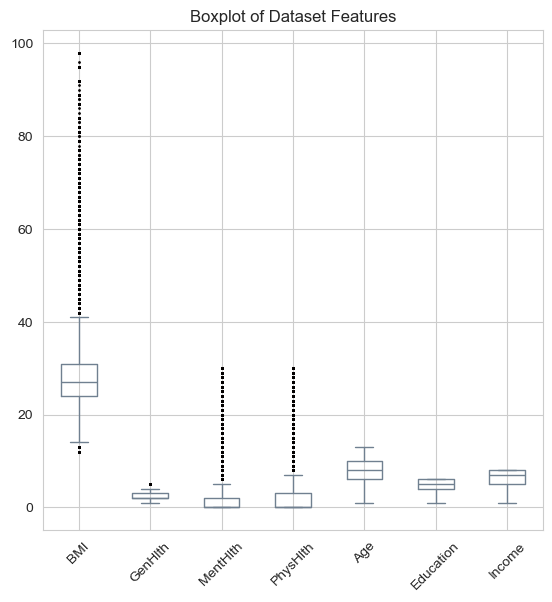

In [14]:
import matplotlib.pyplot as plt

#numerical_columns = x.columns
#numerical_columns = [col for col in numerical_columns]

non_binary_columns = [col for col in x.columns if x[col].nunique() > 2]

data = [x[column].dropna() for column in non_binary_columns]

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])

axes.boxplot(data,
             boxprops=dict(color='slategrey', linewidth=1.0),
             whiskerprops=dict(color='slategrey', linewidth=1.0),
             capprops=dict(color='slategrey', linewidth=1.0),
             flierprops=dict(marker='o', markerfacecolor='red', markersize=1),
             medianprops=dict(color='slategrey', linewidth=1))

plt.title('Boxplot of Dataset Features')
plt.xticks(range(1, len(non_binary_columns) + 1), non_binary_columns, rotation=45)

plt.show()

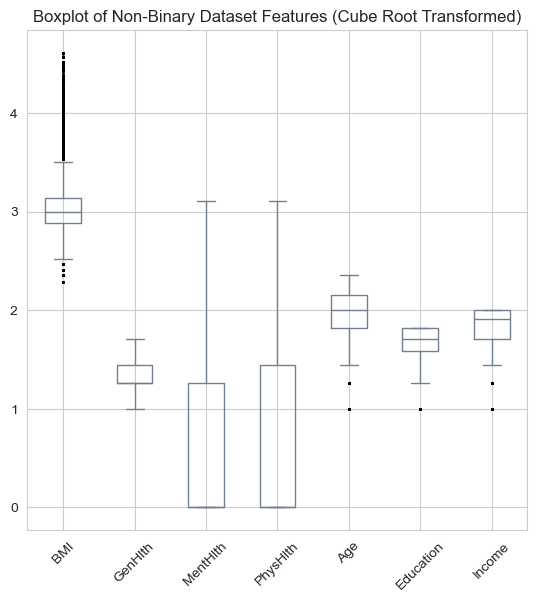

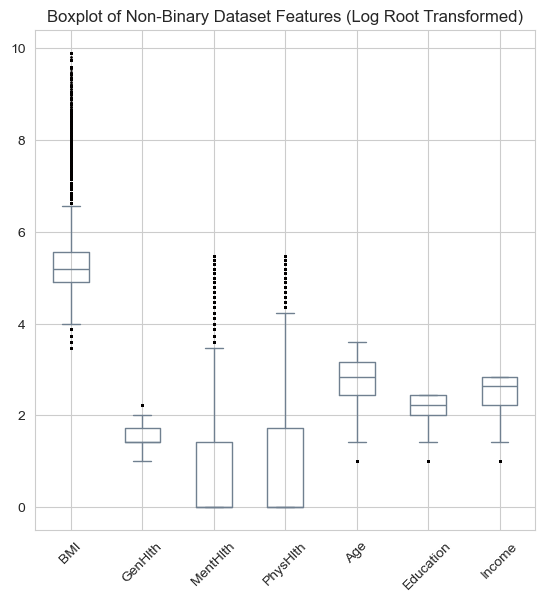

In [20]:
import matplotlib.pyplot as plt

non_binary_columns = [col for col in x.columns if x[col].nunique() > 2]

data_transformed = [x[col].dropna().apply(lambda v: np.cbrt(v)) for col in non_binary_columns]

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.boxplot(data_transformed,
             boxprops=dict(color='slategrey', linewidth=1.0),
             whiskerprops=dict(color='slategrey', linewidth=1.0),
             capprops=dict(color='slategrey', linewidth=1.0),
             flierprops=dict(marker='o', markerfacecolor='red', markersize=1),
             medianprops=dict(color='slategrey', linewidth=1))
plt.title('Boxplot of Non-Binary Dataset Features (Cube Root Transformed)')
plt.xticks(range(1, len(non_binary_columns) + 1), non_binary_columns, rotation=45)
plt.show()

fig = plt.figure(figsize=(5, 5))
data_transformed = [x[col].dropna().apply(lambda v: np.sqrt(v)) for col in non_binary_columns]
axes = fig.add_axes([0, 0, 1, 1])
axes.boxplot(data_transformed,
             boxprops=dict(color='slategrey', linewidth=1.0),
             whiskerprops=dict(color='slategrey', linewidth=1.0),
             capprops=dict(color='slategrey', linewidth=1.0),
             flierprops=dict(marker='o', markerfacecolor='red', markersize=1),
             medianprops=dict(color='slategrey', linewidth=1))
plt.title('Boxplot of Non-Binary Dataset Features (Log Root Transformed)')
plt.xticks(range(1, len(non_binary_columns) + 1), non_binary_columns, rotation=45)
plt.show()

<br><br>

---

## Correlation analysis with correlation matrix

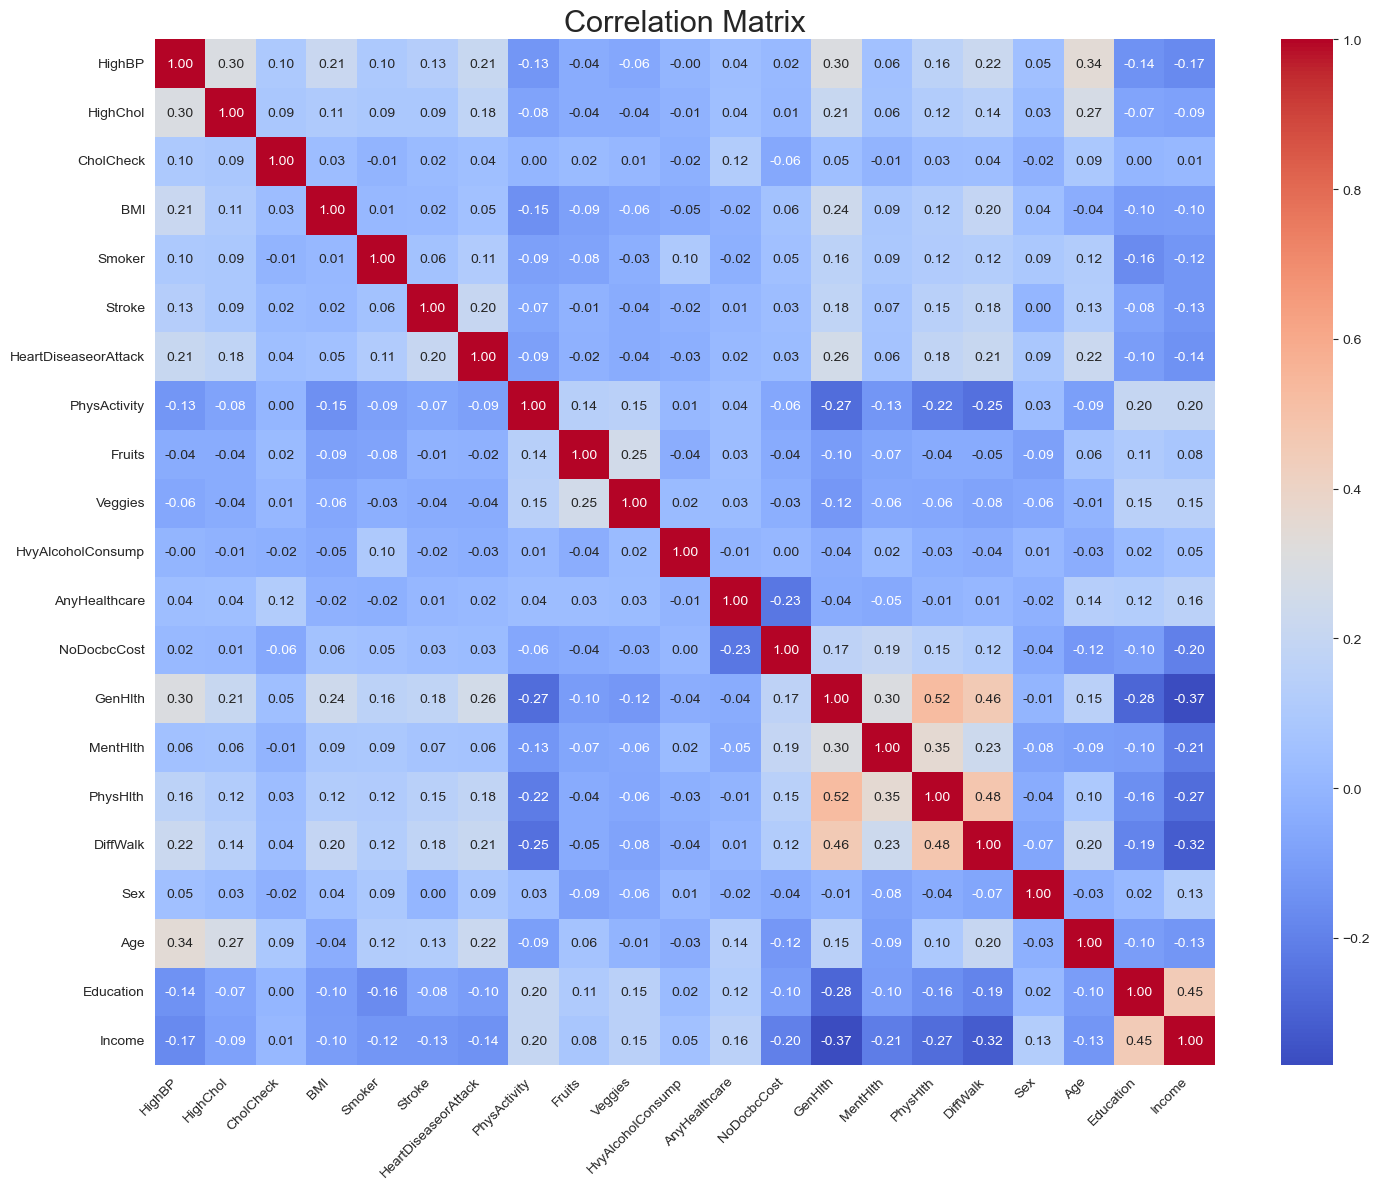

In [10]:
import seaborn as sns

correlation_matrix = x.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title('Correlation Matrix', fontsize=22)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<br><br>

---

## Probability distribution analysis with histograms

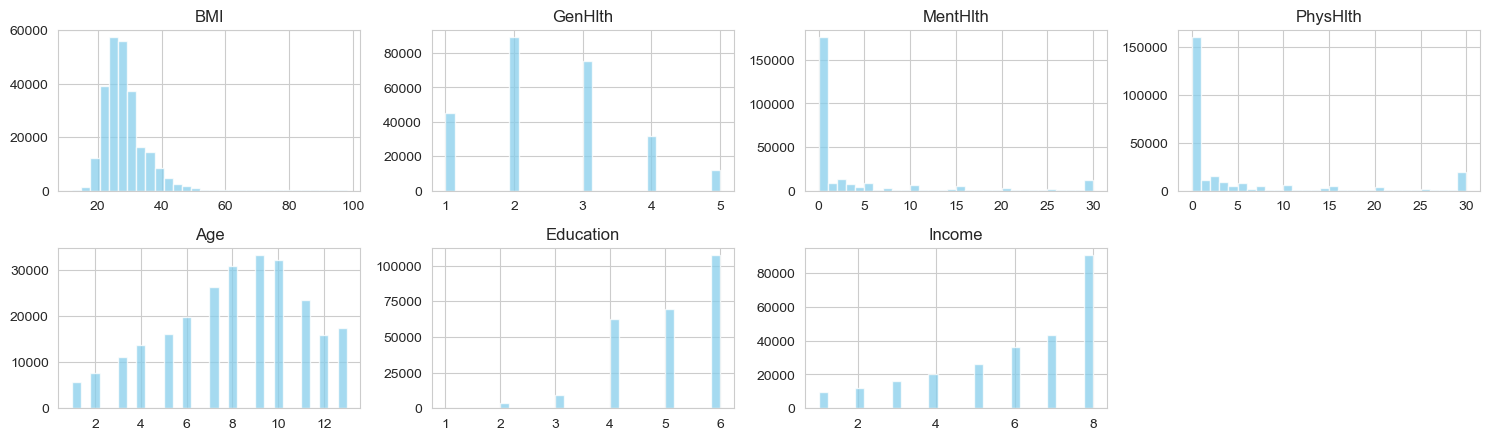

In [13]:
plt.figure(figsize=(15, 13))

non_binary_columns = [col for col in x.columns if x[col].nunique() > 2]

for i, column in enumerate(non_binary_columns, 1):
    plt.subplot(6, 4, i)
    plt.hist(x[column], bins=30, color='skyblue', alpha=0.75)
    plt.title(column)
    plt.tight_layout()

plt.show()

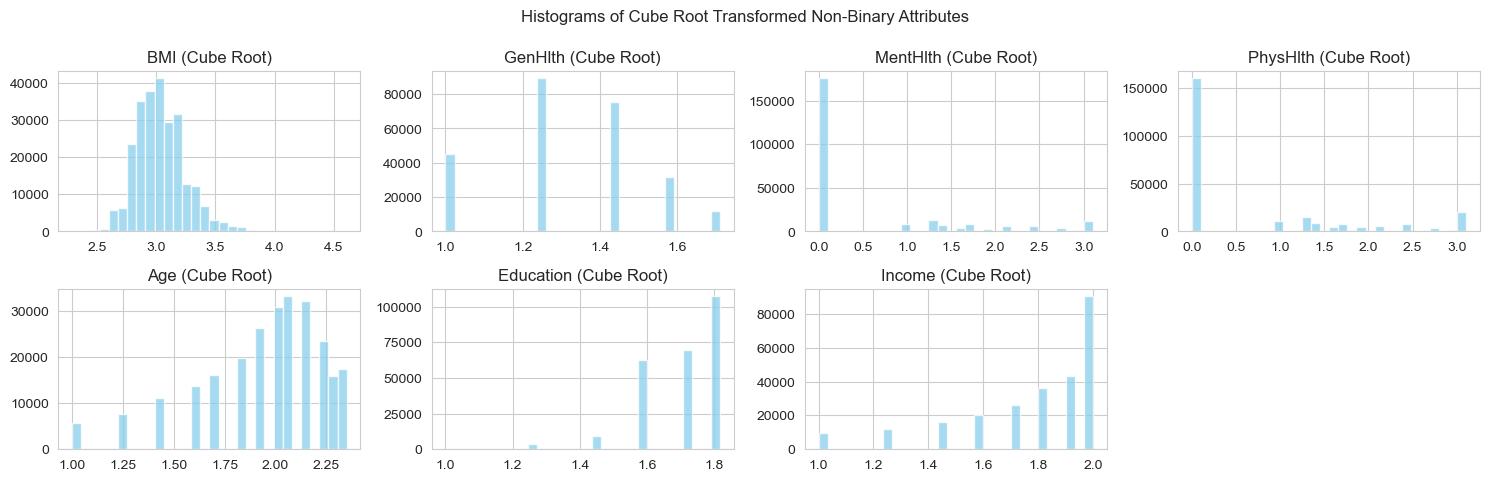

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 13))

non_binary_columns = [col for col in x.columns if x[col].nunique() > 2]

for i, column in enumerate(non_binary_columns, 1):
    plt.subplot(6, 4, i)
    transformed_data = x[column].dropna().apply(lambda v: np.cbrt(v))  # Cube root transformation
    plt.hist(transformed_data, bins=30, color='skyblue', alpha=0.75)
    plt.title(f'{column} (Cube Root)')
    plt.tight_layout()

plt.suptitle('Histograms of Cube Root Transformed Non-Binary Attributes', y=1.02)
plt.show()

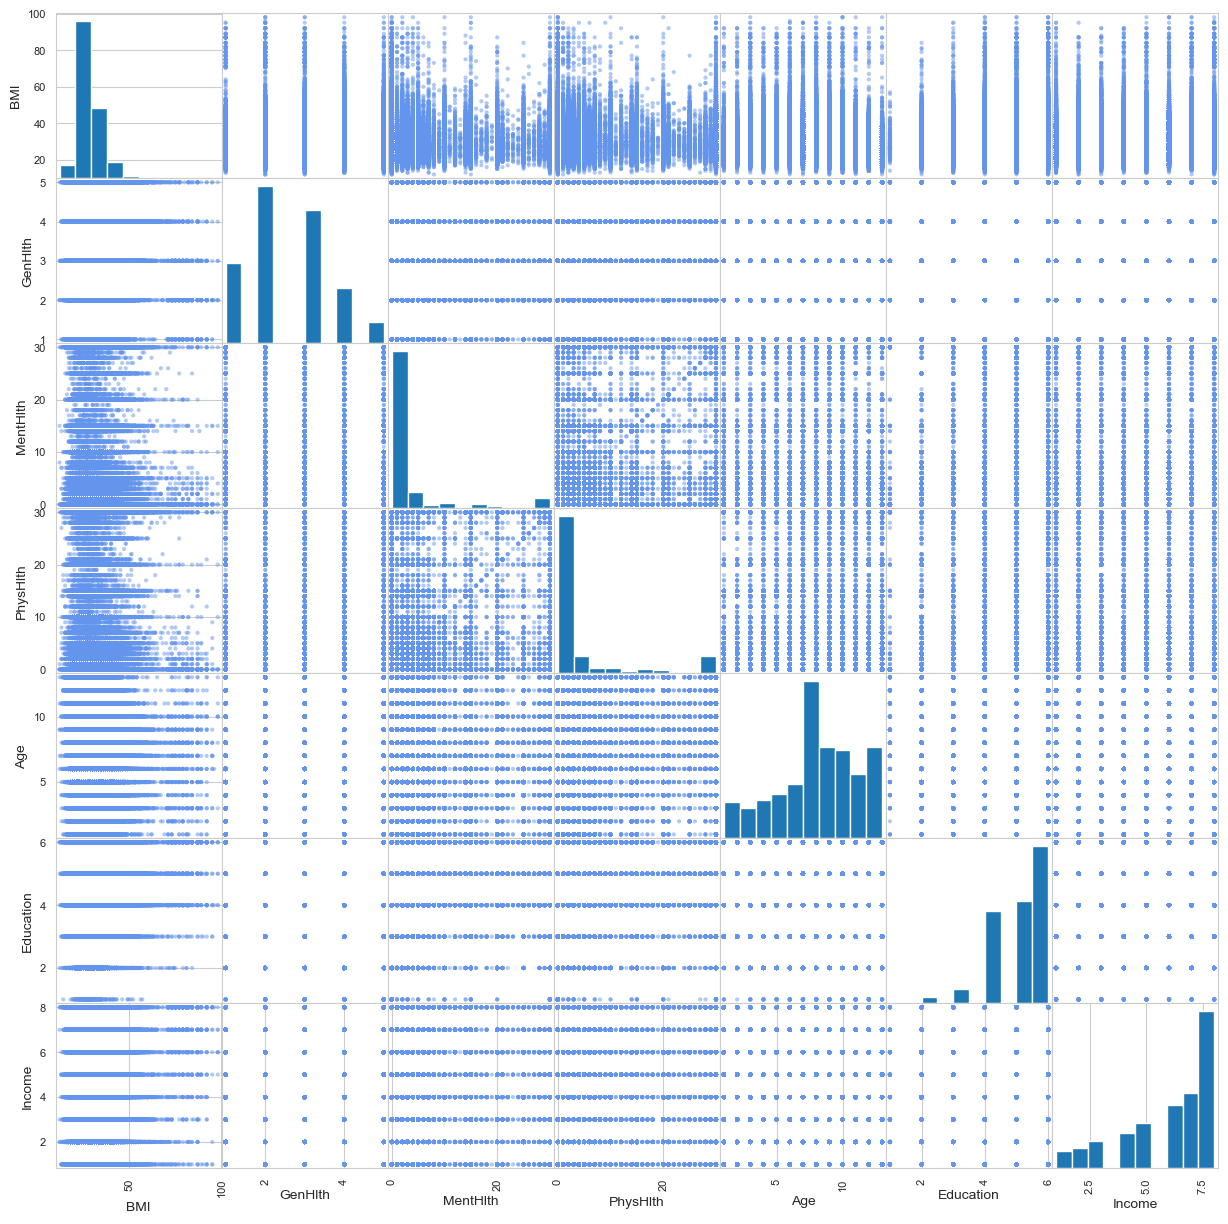

In [66]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix


binary_columns = [col for col in x.columns if x[col].nunique() == 2]
non_binary_data = x.drop(columns=binary_columns)
pd.plotting.scatter_matrix(non_binary_data, figsize=(15, 15), diagonal='hist', color='cornflowerblue')
plt.show()

<br><br>

---

## Weight by Information Gain

In [17]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

info_gain = mutual_info_classif(x, y, discrete_features='auto', random_state=42)

feature_scores = pd.DataFrame({
    'Attribute': x.columns,
    'Weight by Information Gain': info_gain
})

feature_scores = feature_scores.sort_values(by='Weight by Information Gain', ascending=False)

print("Weight by Information Gain:\n")
print(feature_scores)

Weight by Information Gain:

               Attribute  Weight by Information Gain
0                 HighBP                    0.053140
13               GenHlth                    0.052544
7           PhysActivity                    0.052416
11         AnyHealthcare                    0.050609
2              CholCheck                    0.048799
8                 Fruits                    0.042253
9                Veggies                    0.042183
1               HighChol                    0.040654
3                    BMI                    0.030828
17                   Sex                    0.025712
4                 Smoker                    0.024667
18                   Age                    0.023585
19             Education                    0.023357
16              DiffWalk                    0.022721
20                Income                    0.021443
6   HeartDiseaseorAttack                    0.014241
15              PhysHlth                    0.014222
5                

<br><br>

---

## Weight by Information Gain Ratio

In [26]:
def entropy(column):
    if isinstance(column, np.ndarray):
        column = pd.Series(column)
    counts = column.value_counts(normalize=True)
    return -np.sum(counts * np.log2(counts))

def information_gain(x, y):
    if isinstance(x, np.ndarray):
        x = pd.Series(x)
    if isinstance(y, np.ndarray):
        y = pd.Series(y)
    total_entropy = entropy(y)
    feature_entropy = 0
    for value in x.unique():
        subset = y[x == value]
        feature_entropy += (len(subset) / len(x)) * entropy(subset)
    return total_entropy - feature_entropy

def information_gain_ratio(x, y):
    info_gain = information_gain(x, y)
    feature_entropy = entropy(x)
    if feature_entropy == 0: 
        return 0
    return info_gain / feature_entropy

igr_scores = [information_gain_ratio(x[feature], y) for feature in x.columns]

igr_feature_scores = pd.DataFrame({
    'Attribute': x.columns, 
    'Weight by Information Gain Ratio': igr_scores
})
igr_feature_scores = igr_feature_scores.sort_values(by='Weight by Information Gain Ratio', ascending=False)

print("Information Gain Ratio:\n")
print(igr_feature_scores)

Information Gain Ratio:

               Attribute  Weight by Information Gain Ratio
0                 HighBP                          0.051251
16              DiffWalk                          0.044013
6   HeartDiseaseorAttack                          0.040081
13               GenHlth                          0.030521
1               HighChol                          0.029229
5                 Stroke                          0.026029
2              CholCheck                          0.018720
7           PhysActivity                          0.011635
10     HvyAlcoholConsump                          0.009218
15              PhysHlth                          0.008799
3                    BMI                          0.008772
18                   Age                          0.008253
20                Income                          0.007386
19             Education                          0.006036
9                Veggies                          0.003128
4                 Smoker       

<br><br>

---

## Weight by Chi-Squared Statistic

import pandas as pd
import numpy as np

X_log_transformed = x.apply(lambda x: np.log(x + 1) if np.issubdtype(x.dtype, np.number) else x)

correlation_matrix_transformed = X_log_transformed.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix_transformed, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Log-Transformed Data)', fontsize=22)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
from sklearn.feature_selection import SelectKBest, chi2

chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(x, y)

chi2_scores = chi2_selector.scores_

chi2_feature_scores = pd.DataFrame({'Attribute': x.columns, 'Weight by Chi-Squared Statistic': chi2_scores})
chi2_feature_scores = chi2_feature_scores.sort_values(by='Weight by Chi-Squared Statistic', ascending=False)

print("Feature selection by Chi-Squared Statistic:\n")
print(chi2_feature_scores)

Feature selection by Chi-Squared Statistic:

               Attribute  Weight by Chi-Squared Statistic
15              PhysHlth                    133424.406534
14              MentHlth                     21029.632228
3                    BMI                     18355.166400
16              DiffWalk                     10059.506391
0                 HighBP                     10029.013935
13               GenHlth                      9938.507776
18                   Age                      9276.141199
6   HeartDiseaseorAttack                      7221.975378
1               HighChol                      5859.710582
20                Income                      4829.816361
5                 Stroke                      2725.225194
7           PhysActivity                       861.887532
10     HvyAlcoholConsump                       779.424807
19             Education                       756.035496
4                 Smoker                       521.978858
12           NoDocbcCost   

<br><br>

---

## Weight by Correlation

In [33]:
correlation_matrix = x.corr()

y_correlation = x.apply(lambda x: x.corr(pd.Series(y)))

correlation_scores = pd.DataFrame({'Feature': x.columns, 'Correlation with Target': y_correlation})
correlation_scores = correlation_scores.sort_values(by='Correlation with Target', ascending=False)

print("Feature ranking by Correlation:\n")
print(correlation_scores)

Feature ranking by Correlation:

                                   Feature  Correlation with Target
GenHlth                            GenHlth                 0.293569
HighBP                              HighBP                 0.263129
DiffWalk                          DiffWalk                 0.218344
BMI                                    BMI                 0.216843
HighChol                          HighChol                 0.200276
Age                                    Age                 0.177442
HeartDiseaseorAttack  HeartDiseaseorAttack                 0.177282
PhysHlth                          PhysHlth                 0.171337
Stroke                              Stroke                 0.105816
MentHlth                          MentHlth                 0.069315
CholCheck                        CholCheck                 0.064761
Smoker                              Smoker                 0.060789
NoDocbcCost                    NoDocbcCost                 0.031433
Sex            

<br><br>

---

## Probability Distribution Bar Charts

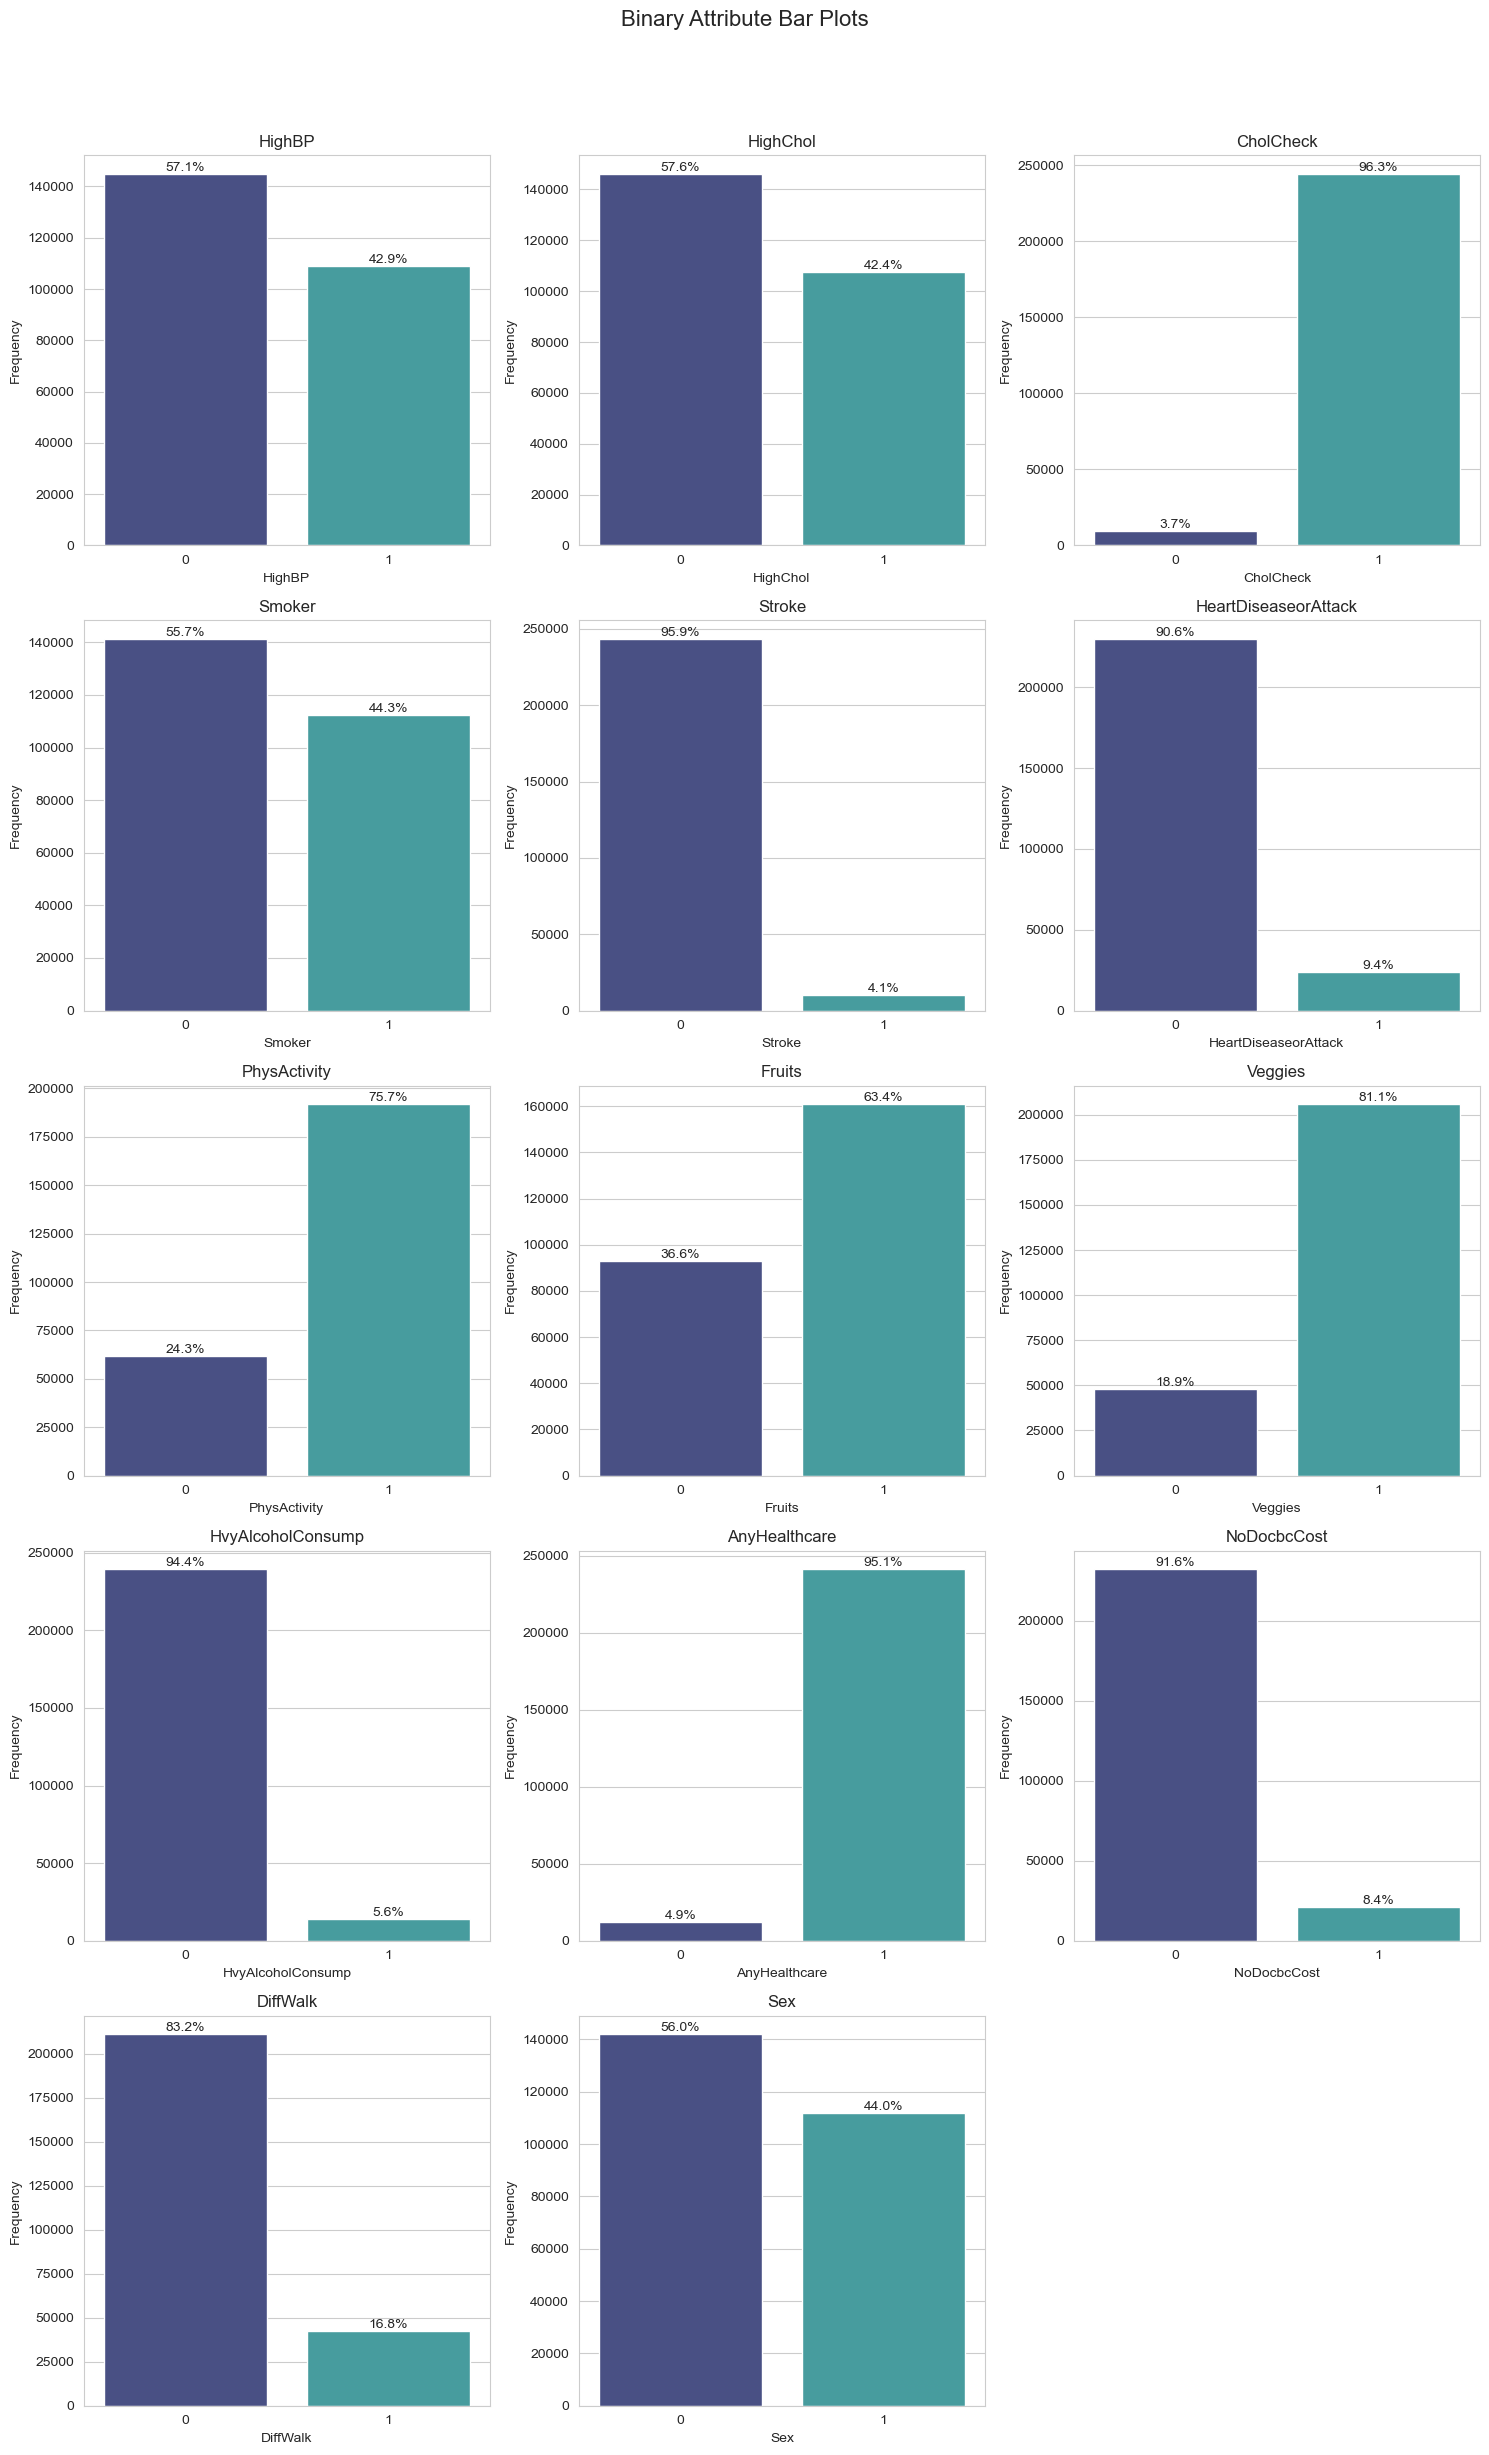

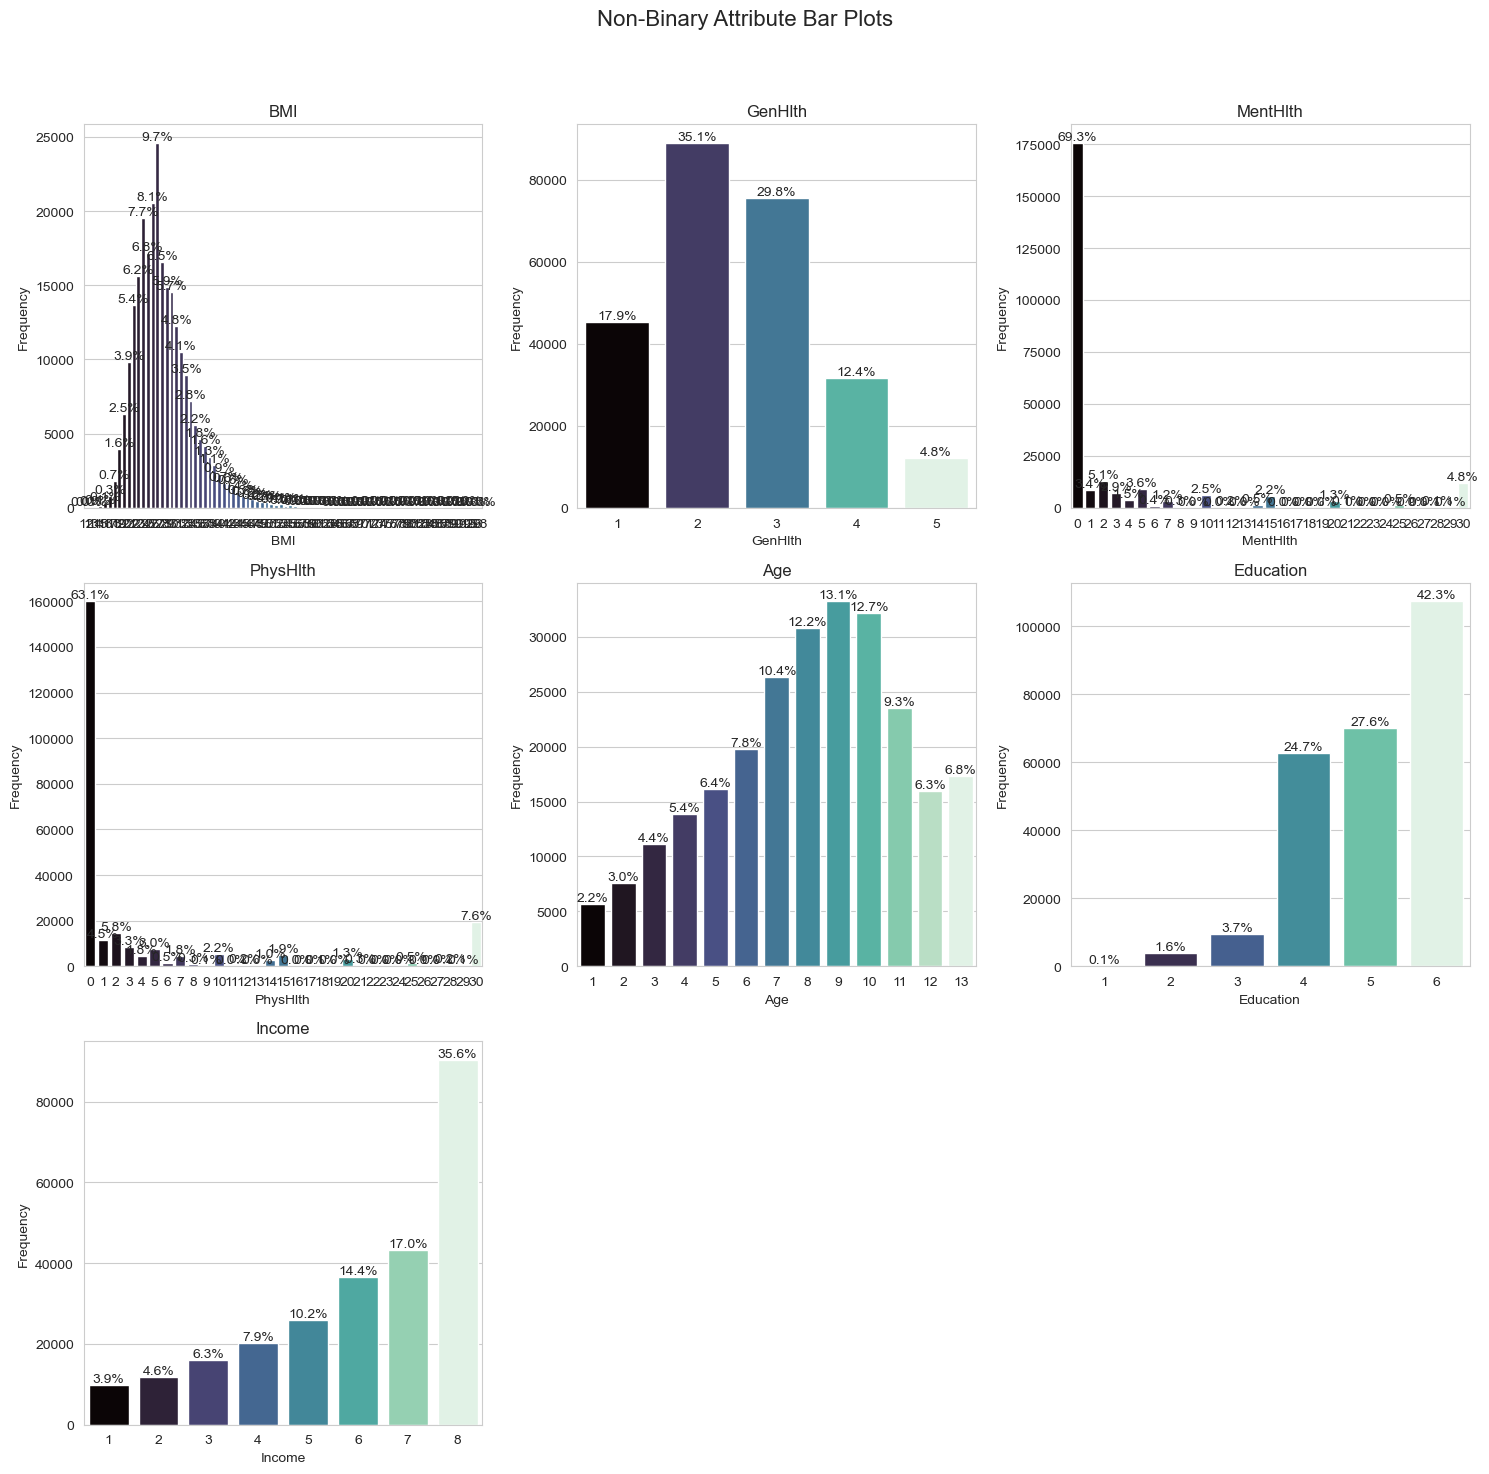

In [7]:
binary_columns = [col for col in x.columns if x[col].nunique() == 2]
non_binary_columns = [col for col in x.columns if x[col].nunique() > 2]

def add_percentage_labels(ax, total_count):
    for bar in ax.patches:
        count = bar.get_height()
        percentage = (count / total_count) * 100
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{percentage:.1f}%",
            ha="center",
            va="bottom",
            fontsize=10
        )

def plot_barplots(columns, data, title):
    num_columns = len(columns)
    n_cols = 3
    n_rows = (num_columns // n_cols) + (num_columns % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        value_counts = data[column].value_counts()
        total_count = value_counts.sum()

        sns.barplot(
            x=value_counts.index,
            y=value_counts.values,
            hue=value_counts.index,
            ax=axes[i],
            palette="mako",
            dodge=False,
            legend=False
        )
        
        axes[i].set_title(f"{column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency")
        add_percentage_labels(axes[i], total_count)

    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

plot_barplots(binary_columns, x, title="Binary Attribute Bar Plots")
plot_barplots(non_binary_columns, x, title="Non-Binary Attribute Bar Plots")

<br> <br>

---

## Probability Distribution Histograms

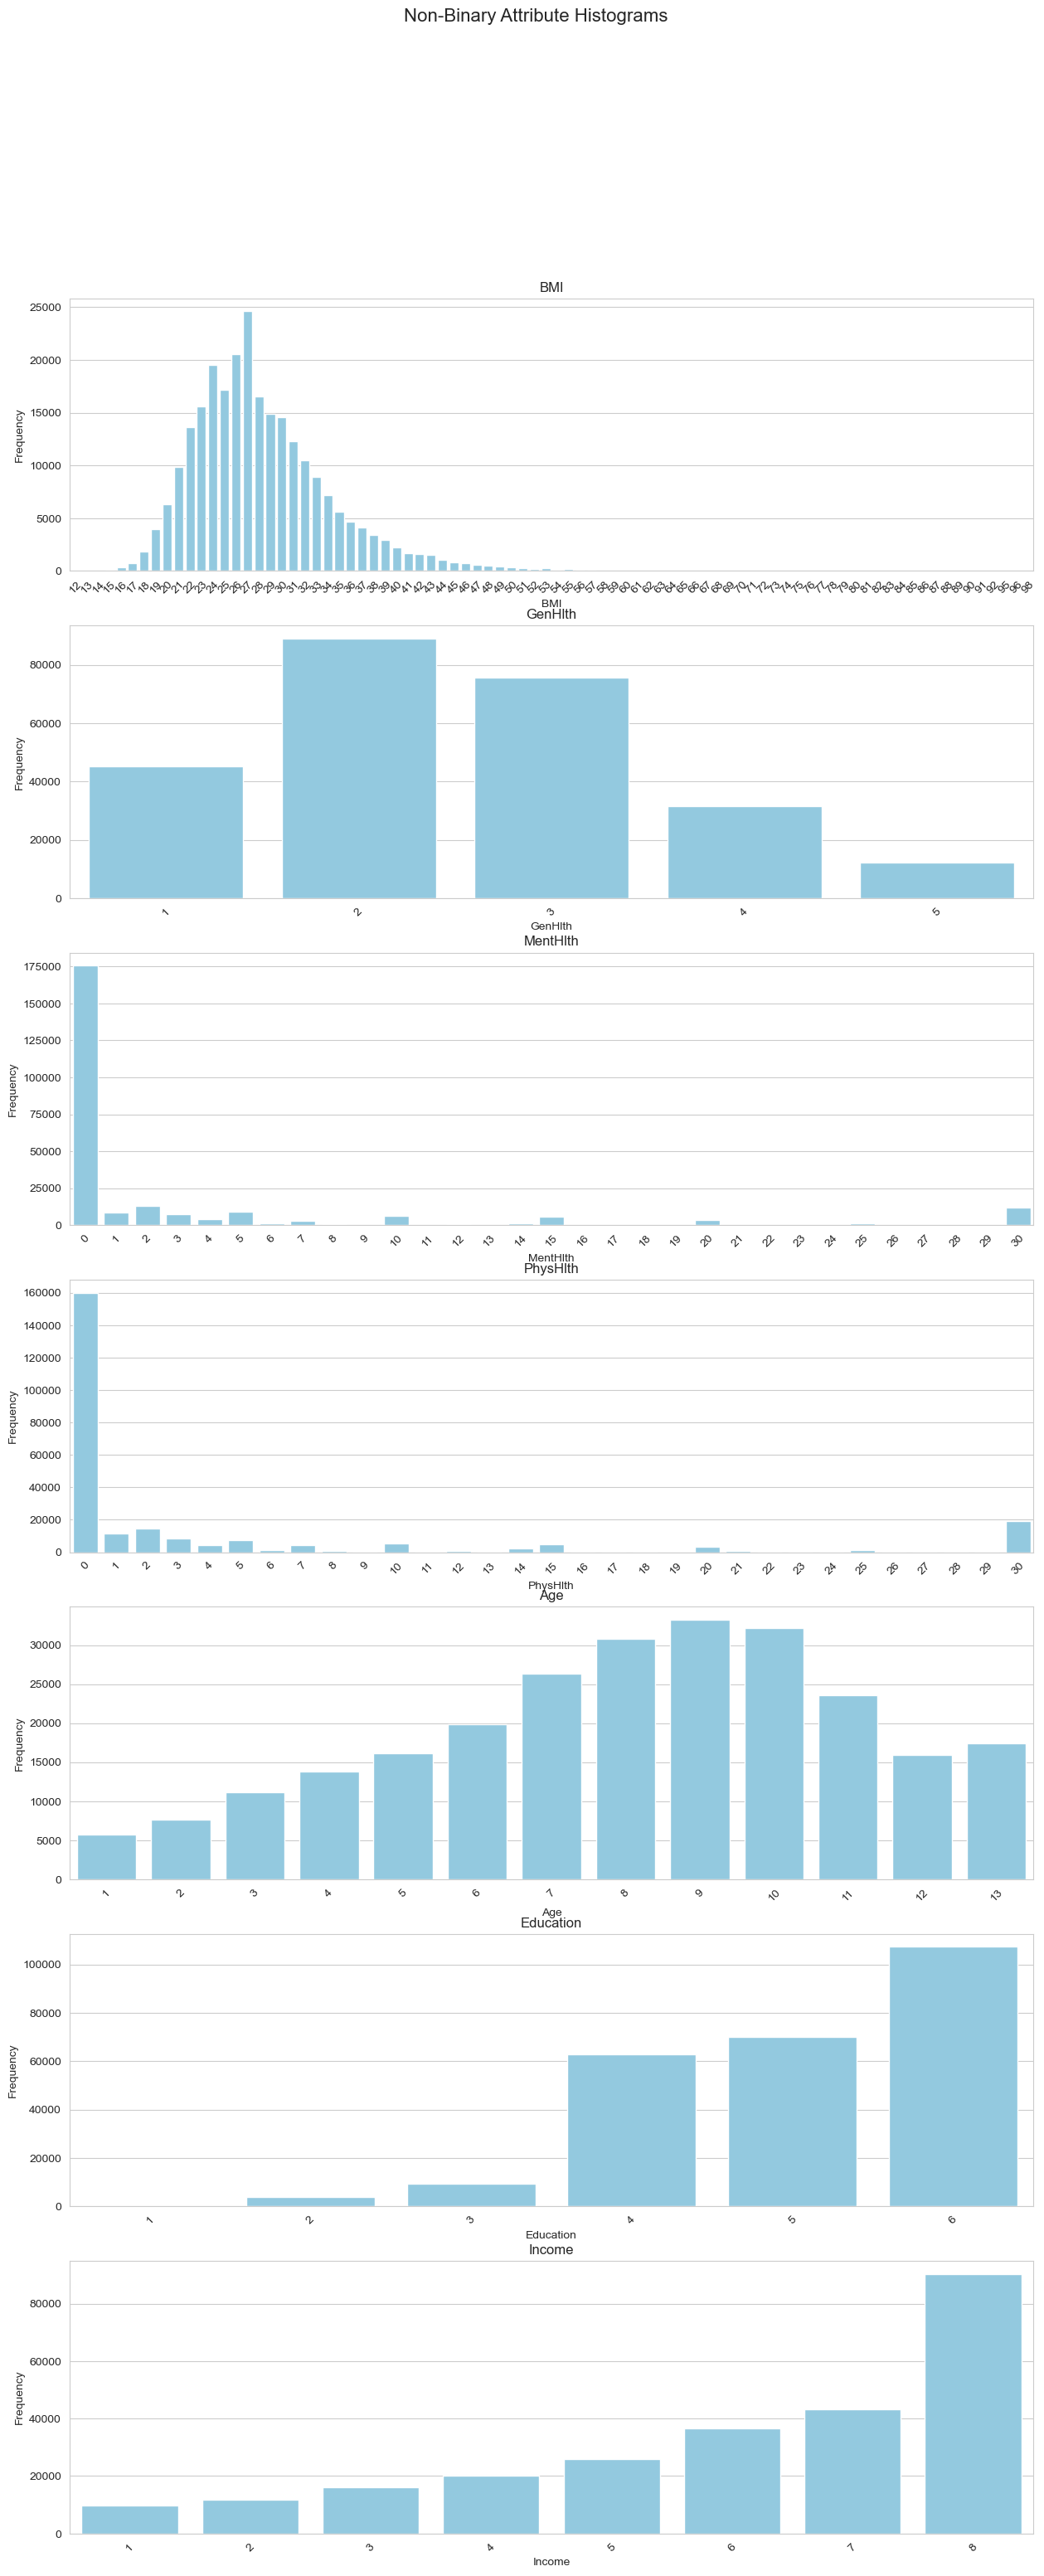

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histograms(columns, data, title):
    num_columns = len(columns)
    n_cols = 1
    n_rows = (num_columns // n_cols) + (num_columns % n_cols > 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(columns):
        ax = sns.countplot(
            x=data[column],
            ax=axes[i],
            color='skyblue',
            width=0.8
        )
        
        axes[i].set_title(f"{column}")
        axes[i].set_xlabel(column)
        axes[i].set_ylabel("Frequency")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title, fontsize=16)
    plt.show()

plot_histograms(non_binary_columns, x, title="Non-Binary Attribute Histograms")

<br> <br>

---

## Normalization of Data with Correlation Matrix and Weight by Information Gain

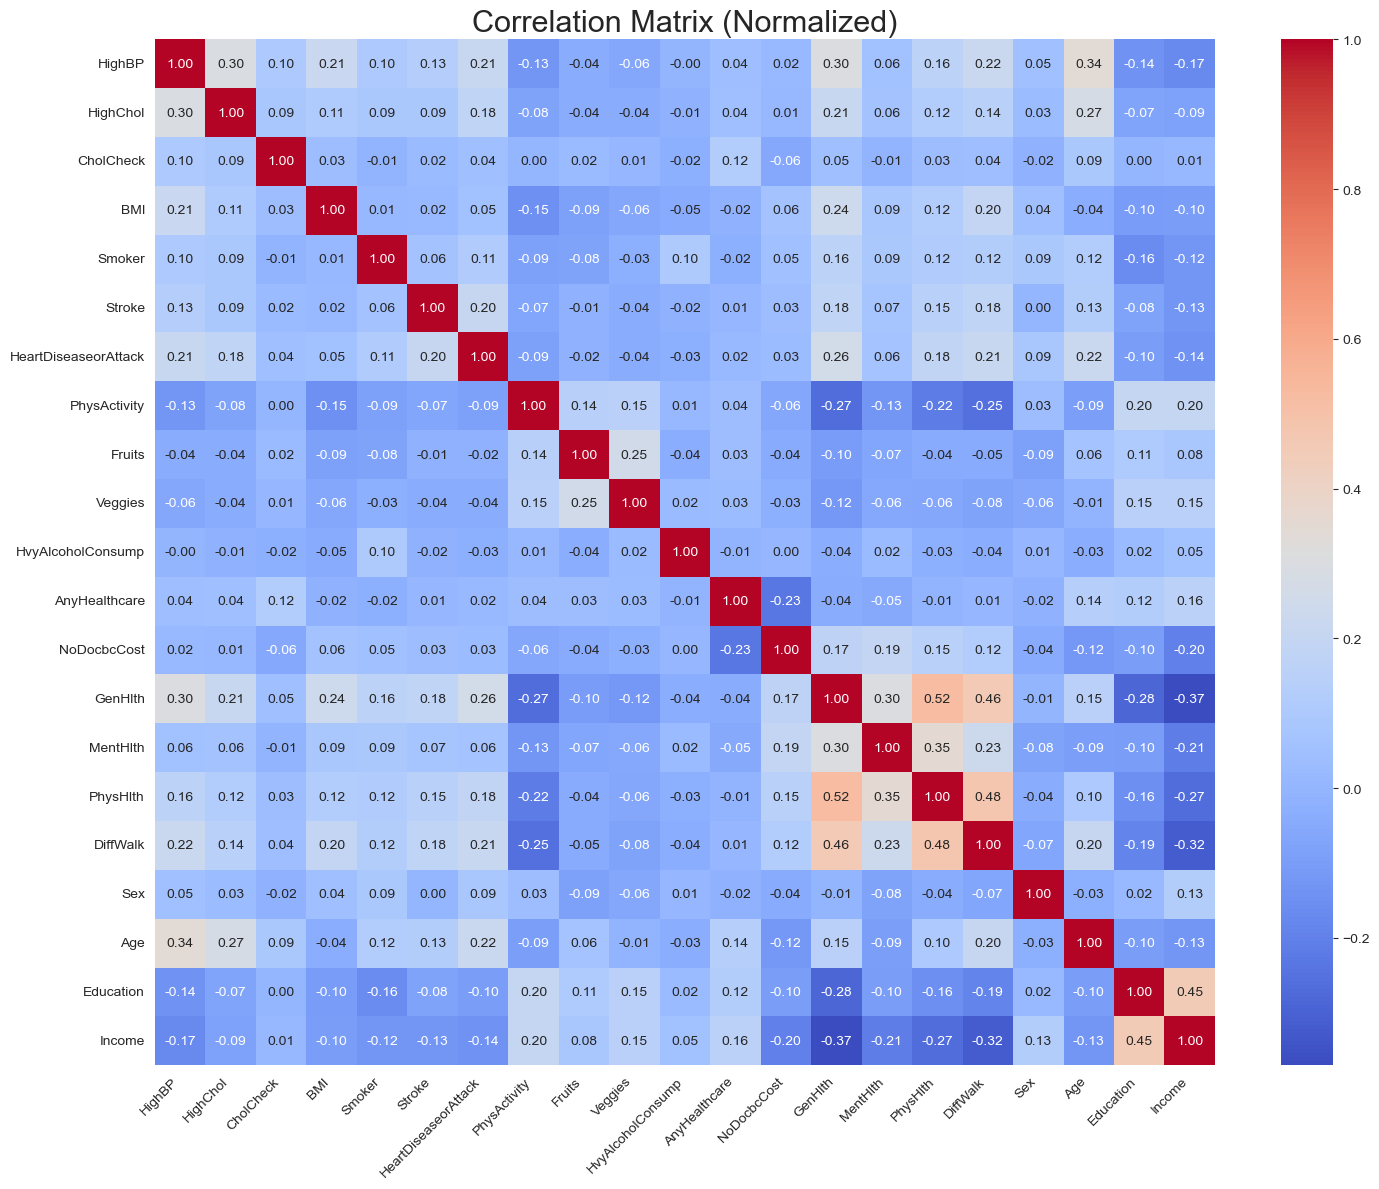

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Weight by Information Gain before Normalization:

               Attribute  Weight by Information Gain before Normalization
0                 HighBP                                         0.053140
13               GenHlth                                         0.052544
7           PhysActivity                                         0.052416
11         AnyHealthcare                                         0.050609
2              CholCheck                                         0.048799
8                 Fruits                                         0.042253
9                Veggies                                         0.042183
1               HighChol                                         0.040654
3                    BMI                                         0.030828
17                   Sex                                         0.025712
4                 Smoker                                         0.024667
18                   Age                                      

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Weight by Information Gain after Normalization:

               Attribute  Weight by Information Gain after Normalization
0                 HighBP                                        0.055045
13               GenHlth                                        0.049833
1               HighChol                                        0.042060
16              DiffWalk                                        0.034071
7           PhysActivity                                        0.030374
3                    BMI                                        0.029489
6   HeartDiseaseorAttack                                        0.027015
8                 Fruits                                        0.023031
17                   Sex                                        0.022663
4                 Smoker                                        0.022015
18                   Age                                        0.022001
15              PhysHlth                                        0.020836
20

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

scaler = StandardScaler()
diabetes_normalized = x.copy()

columns_to_normalize = ['HighBP', 'HighChol','CholCheck','BMI','Smoker','Stroke','HeartDiseaseorAttack','PhysActivity','Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare','NoDocbcCost', 'GenHlth','MentHlth','PhysHlth','DiffWalk','Sex', 'Age', 'Education', 'Income']

diabetes_normalized[columns_to_normalize] = scaler.fit_transform(diabetes_normalized[columns_to_normalize])

# Correlation matrix
correlation_matrix = diabetes_normalized.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")

plt.title('Correlation Matrix (Normalized)', fontsize=22)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Weight by info gain before normalization
info_gain = mutual_info_classif(x, y, discrete_features='auto', random_state=42)

feature_scores = pd.DataFrame({
    'Attribute': x.columns,
    'Weight by Information Gain before Normalization': info_gain
})

feature_scores = feature_scores.sort_values(by='Weight by Information Gain before Normalization', ascending=False)

print("Weight by Information Gain before Normalization:\n")
print(feature_scores)

# Weight by info gain
info_gain = mutual_info_classif(diabetes_normalized, y, discrete_features='auto', random_state=42)

feature_scores = pd.DataFrame({
    'Attribute': x.columns,
    'Weight by Information Gain after Normalization': info_gain
})

feature_scores = feature_scores.sort_values(by='Weight by Information Gain after Normalization', ascending=False)

print("Weight by Information Gain after Normalization:\n")
print(feature_scores)